In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Servidores
servidores_url = 'http://bit.do/servidores_ufrn'
ingressantes = 'http://bit.do/ingressantes_2017'

In [3]:
#Leitura das colunas que serão úteis
servidores = pd.read_csv(servidores_url, sep=';', usecols = ['nome', 'situacao_servidor', 'unidade', 'admissao'])

In [4]:
servidores.dropna(inplace=True)

In [5]:
servidores.loc[0:2]

,nome,situacao_servidor,unidade,admissao
0,ABIATA MARTINS,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981-10-06 00:00:00
1,ABIGAIL CALDAS BATISTA GONDIM,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979-04-01 00:00:00
2,ABIGAIL DE ANDRADE SOUZA,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969-10-21 00:00:00


In [6]:
#Devolvemos o valor do ano pela função Split
servidores['admissao'] = servidores.admissao.str.split('-').str[0]

In [7]:
servidores['admissao'] = servidores['admissao'].astype(int)

In [ ]:
!conda install -c r rpy2 --y

In [8]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [57]:
%%R 
suppressMessages(library(genderBR))

In [58]:
generos = []
for i in servidores.nome:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
servidores["generos"] = generos

In [59]:
mulheres_info = servidores[servidores.generos == 'Female']
mulheres_info.head()

,nome,situacao_servidor,unidade,admissao,generos
1,ABIGAIL CALDAS BATISTA GONDIM,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979,Female
2,ABIGAIL DE ANDRADE SOUZA,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969,Female
3,ABIGAIL MOURA,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1976,Female
6,ACELINA ISABEL BENVINDO NERI,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1979,Female
7,ADAHYR FLORENCIO SILVA,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1968,Female


In [60]:
total_admissoes = servidores.pivot_table(index='admissao', values='generos', aggfunc='count')
total_admissoes.head()

,generos
admissao,
1943,1
1950,4
1952,5
1953,1
1954,18


In [62]:
#numero de mulheres admitidas por ano
admissoes_mulheres = mulheres_info.pivot_table(index='admissao', values='generos', aggfunc='count') 
admissoes_mulheres.head()

,generos
admissao,
1950,4
1952,5
1953,1
1954,13
1955,25


In [76]:
porcentagem_mulheres = (admissoes_mulheres/total_admissoes)*100
porcentagem_mulheres.dropna(inplace=True)
porcentagem_mulheres.reset_index(inplace=True)
porcentagem_mulheres.head()

,admissao,generos
0,1950,100.000000
1,1952,100.000000
2,1953,100.000000
3,1954,72.222222
4,1955,86.206897


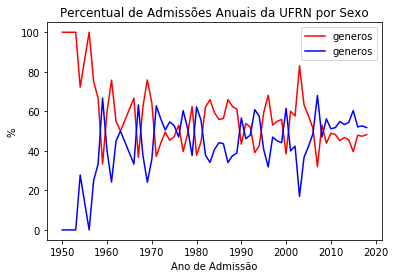

In [79]:
plt.plot(porcentagem_mulheres.admissao,porcentagem_mulheres.generos, c='red',label='Feminino')
plt.plot(porcentagem_mulheres.admissao,100 - porcentagem_mulheres.generos, c = 'blue',label='Masculino')
plt.legend(loc='best')
plt.xlabel("Ano de Admissão")
plt.ylabel("%")
plt.title("Percentual de Admissões Anuais da UFRN por Sexo")
plt.show()

In [7]:
#Filtramos o dataframe, permanecendo assim apenas os servidores ativos
servidores = servidores[servidores['situacao_servidor'] == 'Ativo Permanente']

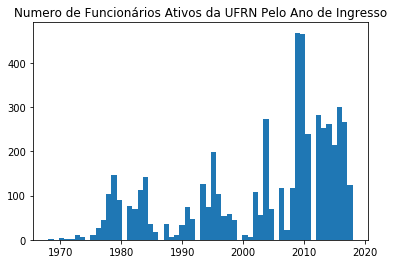

In [9]:
#Número de funcionário ativos da UFRN de cada ano
fig, ax = plt.subplots()
plt.title("Numero de Funcionários Ativos da UFRN Pelo Ano de Ingresso")
ax.hist(servidores['admissao'], bins = 58, range=(1968,2018))
plt.show()

In [13]:
servidores.head()

,nome,situacao_servidor,unidade,admissao,generos
4738,ABDO FARRET NETO,Ativo Permanente,DEPARTAMENTO DE MEDICINA INTEGRADA,2009,Male
4739,ABMAEL BEZERRA DE OLIVEIRA,Ativo Permanente,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,1973,Male
4740,ABNER CARLOS COSTA DE MELO,Ativo Permanente,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2014,Male
4741,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Ativo Permanente,CERES - DEPARTAMENTO DE HISTÓRIA,2016,Male
4742,ACACIA JESSICA MAIA DE MOURA,Ativo Permanente,ESCOLA AGRÍCOLA DE JUNDIAÍ,2013,Female


In [14]:
#Difença em quantidade no numero de servidores da UFRN de ambos os sexos
servidores.generos.value_counts()

Male      2735
Female    2393
Name: generos, dtype: int64

In [27]:
servidores_imd = servidores[servidores.unidade == 'INSTITUTO METROPOLE DIGITAL']

In [34]:
servidores_imd.head()

,nome,situacao_servidor,unidade,admissao,generos
4777,ADJA FERREIRA DE ANDRADE,Ativo Permanente,INSTITUTO METROPOLE DIGITAL,2012,Female
4873,ALDO CARIELO DO NASCIMENTO FILHO,Ativo Permanente,INSTITUTO METROPOLE DIGITAL,2014,Male
4953,ALLANA DE CARVALHO ARAUJO,Ativo Permanente,INSTITUTO METROPOLE DIGITAL,2018,Female
4967,ALUIZIO FERREIRA DA ROCHA NETO,Ativo Permanente,INSTITUTO METROPOLE DIGITAL,2015,Male
4979,ALYSON MATHEUS DE CARVALHO SOUZA,Ativo Permanente,INSTITUTO METROPOLE DIGITAL,2014,Male


In [29]:
#Diferença no numero de servidores do IMD de ambos os sexos
servidores_imd.generos.value_counts()

Male      61
Female    19
Name: generos, dtype: int64